# Project 1: Counting words in college subreddits

Due 9/16. Reminder that you are allowed to use any amount of AI assistance or outside resources with citation

## Part 1: word counting and bag of words

In [1]:
#install spacy in the current conda environment
!pip install spacy


In [2]:
#download a small language model to help with cleaning tasks
!python -m spacy download en_core_web_sm



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 27.9 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
#import required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import spacy
language_model = spacy.load("en_core_web_sm")
import matplotlib.pyplot as plt

import numpy as np

### Problem 1 and example: common words in the Michigan subreddit

In [4]:
#read the data from a csv file in the folder
mich=pd.read_csv("umich.csv")

In [5]:
#jupyter will print a pretty representation of most python objects if you just put the name
#we can see that the full text of each reddit comment is provided in the "text" column
mich

,Unnamed: 0,date,post_votes,text,user,com_votes
0,0,2024-09-04 15:33:20,2,"Zingermans has a nice reuben, pretty pricey bu...",Suspicious-Bad703,2
1,1,2024-09-04 15:33:20,2,I really love Tomokun!,webstbre000,2
2,2,2024-09-04 15:33:20,2,The Seoul is pretty good I especially like the...,iaxlmao,1
3,3,2024-09-04 15:33:20,2,A lot of it depends on what type of food and w...,I-696,1
4,4,2024-09-04 14:32:17,1,You can book completely enclosed private study...,sneep_,2
...,...,...,...,...,...,...
8334,8334,2024-07-02 12:35:36,9,It isn’t a student org,Vibes_And_Smiles,1
8335,8335,2024-07-02 11:07:10,0,Life \nMatter \nLife's matter,tctu,8
8336,8336,2024-07-02 11:07:10,0,google,SUPERazkari,4
8337,8337,2024-07-02 11:07:10,0,That’s a hard question to answer for a set of ...,Own-Resident-3837,-1


In [6]:
#this is a function that does some light cleaning, by removing newline characters, converting to lowercase, and removing punctuation

def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

In [7]:
#pandas allows us to quickly apply this cleaning function to all rows in a column
mich['cleaned_text'] = mich['text'].apply(clean)

In [8]:
#we can see the first comment after cleaning vs before
mich["cleaned_text"][0]
##hellotst

'zingermans has a nice reuben pretty pricey but the sammies are pretty big'

In [9]:
mich["text"][0]

'Zingermans has a nice reuben, pretty pricey but the sammies are pretty big'

In [10]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(mich['cleaned_text'])

In [11]:
#this is a sparse matrix, which is a more efficient way to store a matrix with many zeros
#the matrix has 8339 rows (one for each comment) and 15289 columns (one for each unique word in the dataset)
bag_of_words

<8339x15289 sparse matrix of type '<class 'numpy.int64'>'
	with 221217 stored elements in Compressed Sparse Row format>

In [12]:
#create a dataframe from the sparse matrix
#this is a more human-readable way to view the data
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
bow_df

,aa,aadl,aapd,aata,ab,abab,abandon,abandoned,abbreviation,abbreviations,...,zoned,zones,zoning,zoo,zoom,zoomer,zoomers,zuckerberg,𝓲𝓷𝓼𝓮𝓬𝓾𝓻𝓮,𝘢𝘩𝘦𝘮
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#dataframes have a convenient method for summing the values in each column
#this will give us the number of times each word appears in the dataset
word_counts = bow_df.sum()
#we can sort the values to see the most common words
word_counts = word_counts.sort_values(ascending=False)

#notice that the top words are not very informative, as they are common words that appear in many contexts
#and bottom words include a lot of typos and other noise
word_counts

the            11306
to              8480
and             6921
you             6256
of              5028
               ...  
journals           1
journeywhen        1
jpg                1
js                 1
𝘢𝘩𝘦𝘮               1
Length: 15289, dtype: int64

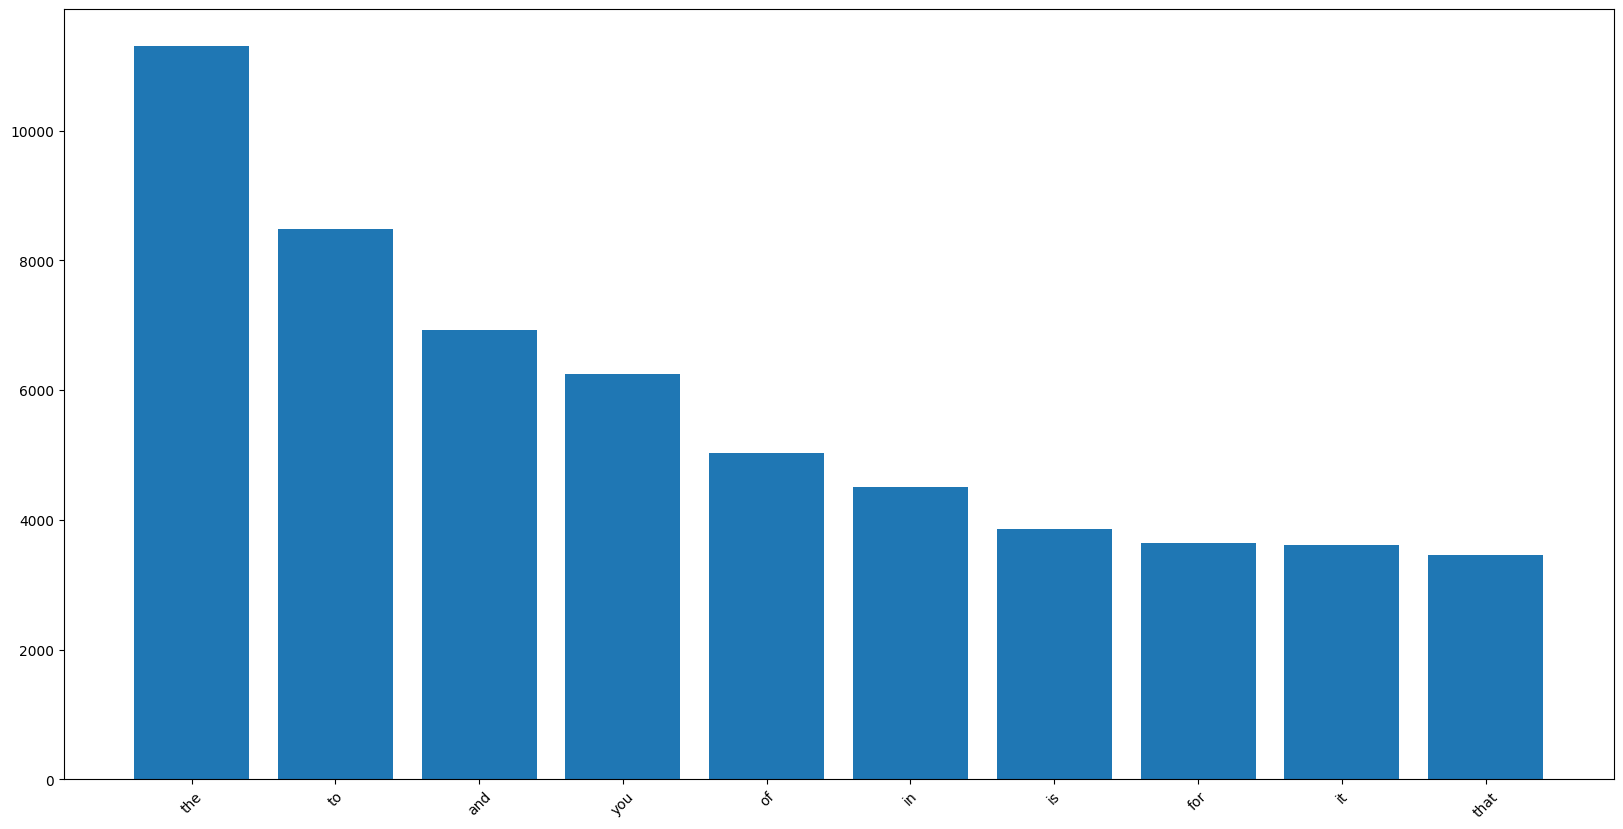

In [14]:
#we can plot the most common words
#we will only plot the top 10 words for readability
word_counts = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(word_counts.index, word_counts.values)
plt.xticks(rotation=45)
plt.show()

#### Question 1: what do you notice about the words in this plot? Is this useful for studying the community?

Answer here: The most common words in the plot are generic such as 'the', 'to', 'and', and do not provide unique insights into the community. They likely include frequent words used in various contexts, making them less useful for analysis. To better understand the community, we should filter out stopwords and focus on meaningful terms, such as domain and community-specific words. 

#### Lemmatization and stopword removal

In [15]:
#lemmatization function from the openclassrooms reading
def lemmatize(text):

   doc = language_model(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

In [16]:
#we can further process the text by removing stopwords and lemmatizing
mich['lemmatized_text'] = mich['cleaned_text'].apply(lemmatize)

In [17]:
#count vectorizer also has parameters min_df and max_df that can be used to filter out words that are too rare or too common
#min_df=3 means that a word must appear in at least 3 documents to be included, this will remove typos and rare words
#max_df=0.3 means that a word must appear in at most 30% of documents to be included, this will remove corpus-specific stopwords

#we are also able to include n-grams in the count vectorizer
#n-grams are sequences of n words that appear together in the text
#the n-gram_range parameter specifies the minimum and maximum n-gram size to include (so in this case, we are including both unigrams and bigrams)

vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(mich['lemmatized_text'])

In [18]:
#we can see that we filtered out 11000 common words and typos
bag_of_words

<8339x8608 sparse matrix of type '<class 'numpy.int64'>'
	with 126768 stored elements in Compressed Sparse Row format>

In [19]:
#we can repeat the previous code to create a dataframe and count the words
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
word_counts = bow_df.sum()
word_counts = word_counts.sort_values(ascending=False)
word_counts

not              2863
student          1183
like             1183
people           1124
class             988
                 ... 
club campus         3
open not            3
open source         3
club activity       3
luck search         3
Length: 8608, dtype: int64

In [20]:
#we can convert this to a percentage instead of an absolute count by dividing by the total number of words
word_counts = word_counts / word_counts.sum()

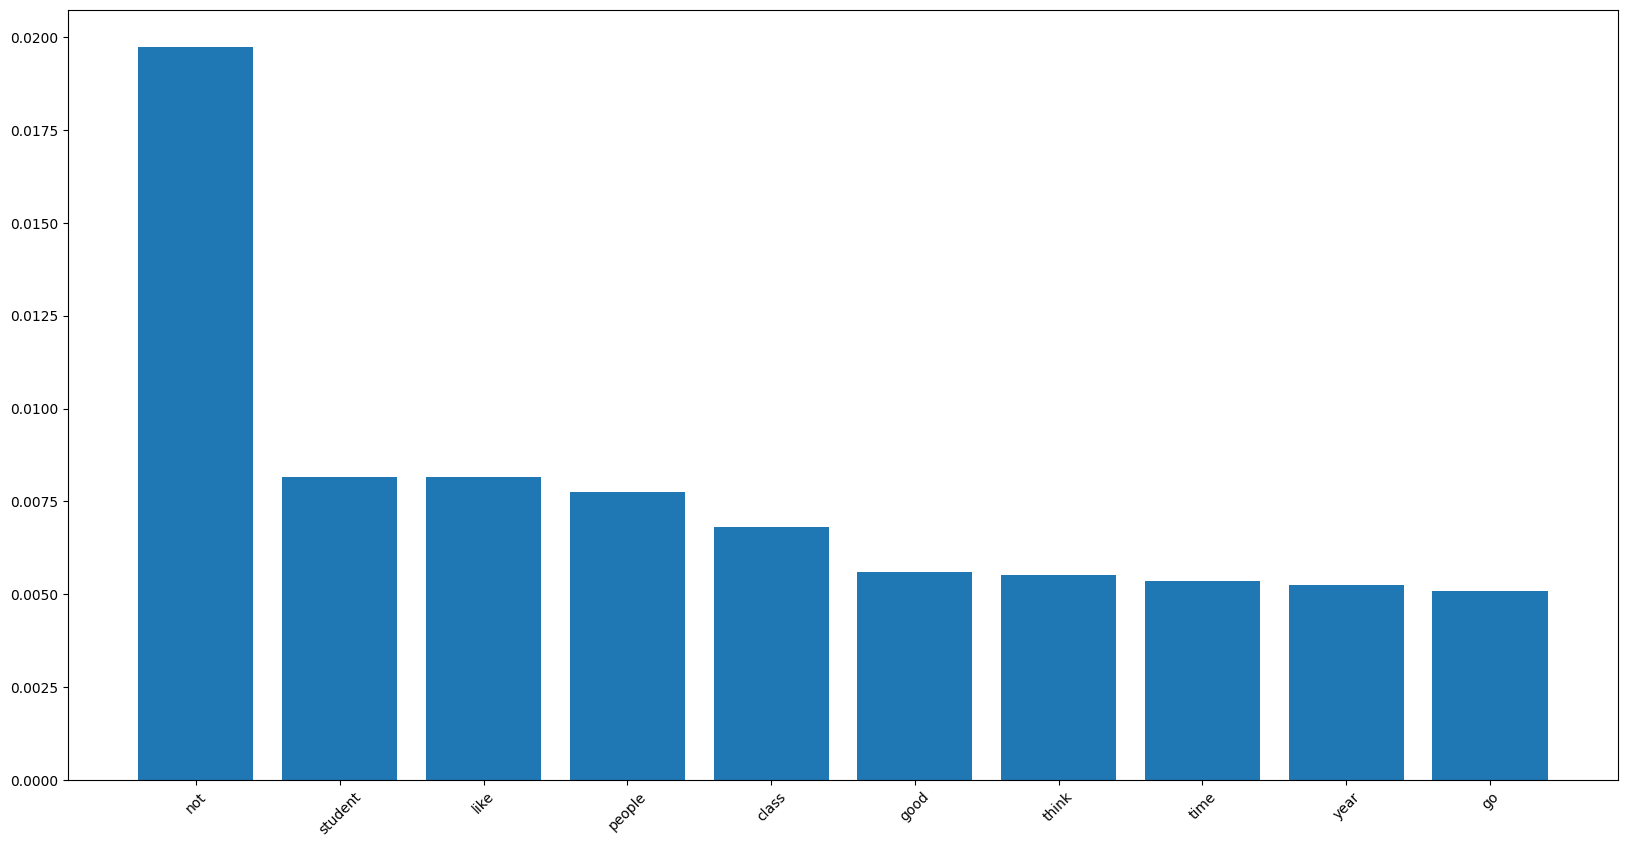

In [21]:
#we can plot the most common words
#we will only plot the top 10 words for readability
plot_list = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

In [22]:
#pandas allows us to access specific words in the series using the index
word_counts["student loan"]

4.1400153180566765e-05

In [23]:
#we can also use a list of words to compare and plot specific words
plot_list=word_counts[["history", "business", "computer science", "cs", "computer"]]
plot_list

history             0.000352
business            0.000600
computer science    0.000035
cs                  0.001228
computer            0.000262
dtype: float64

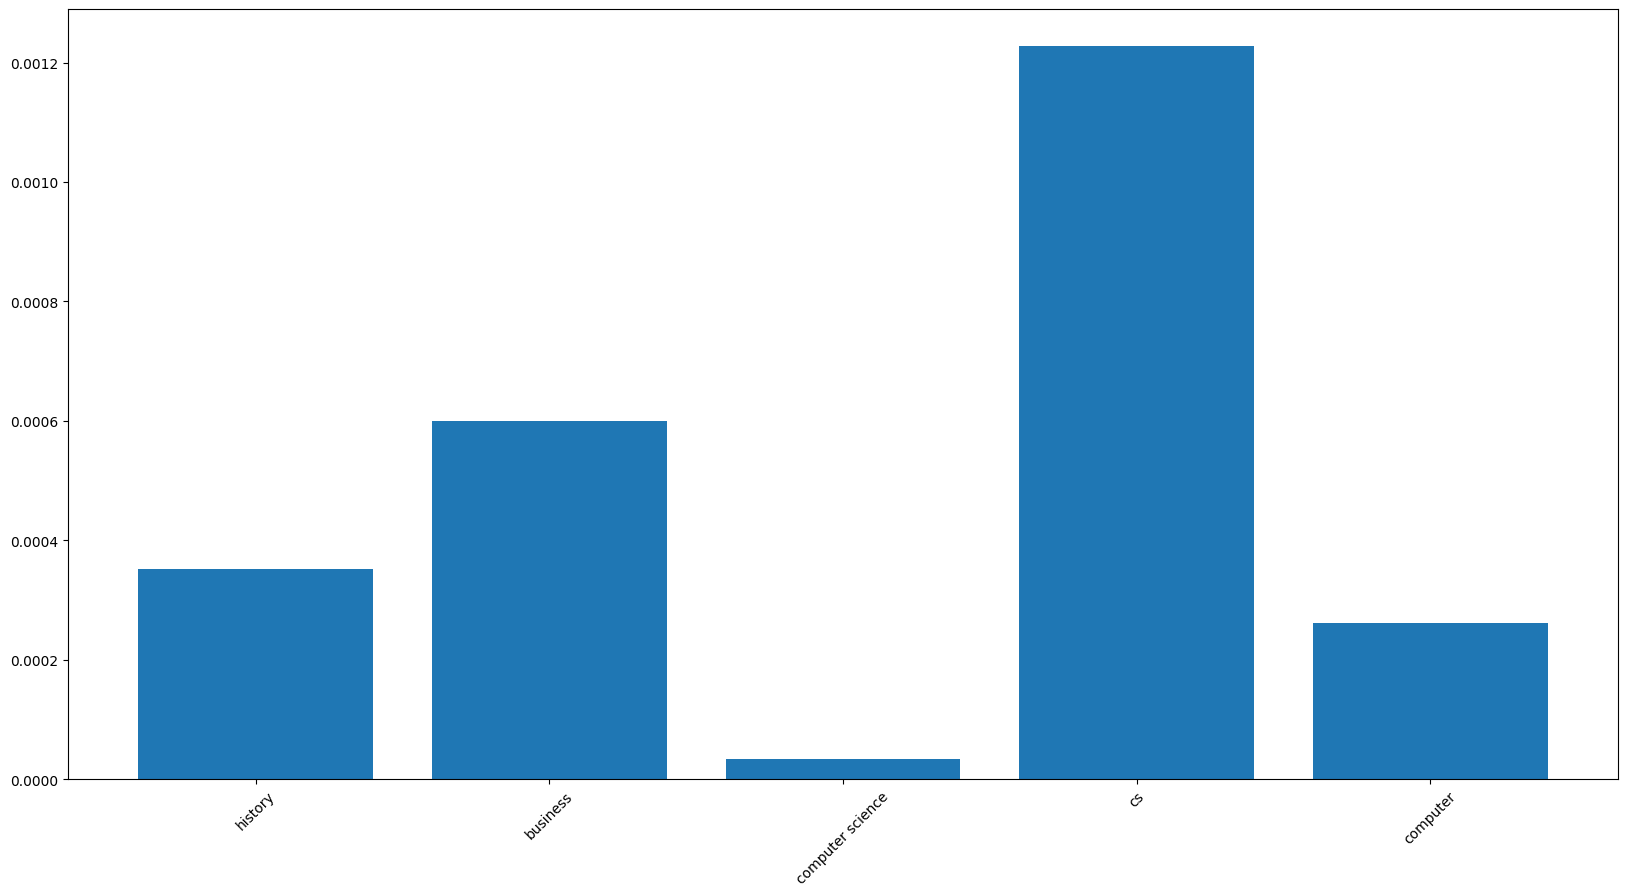

In [24]:

plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

#### Question 2:

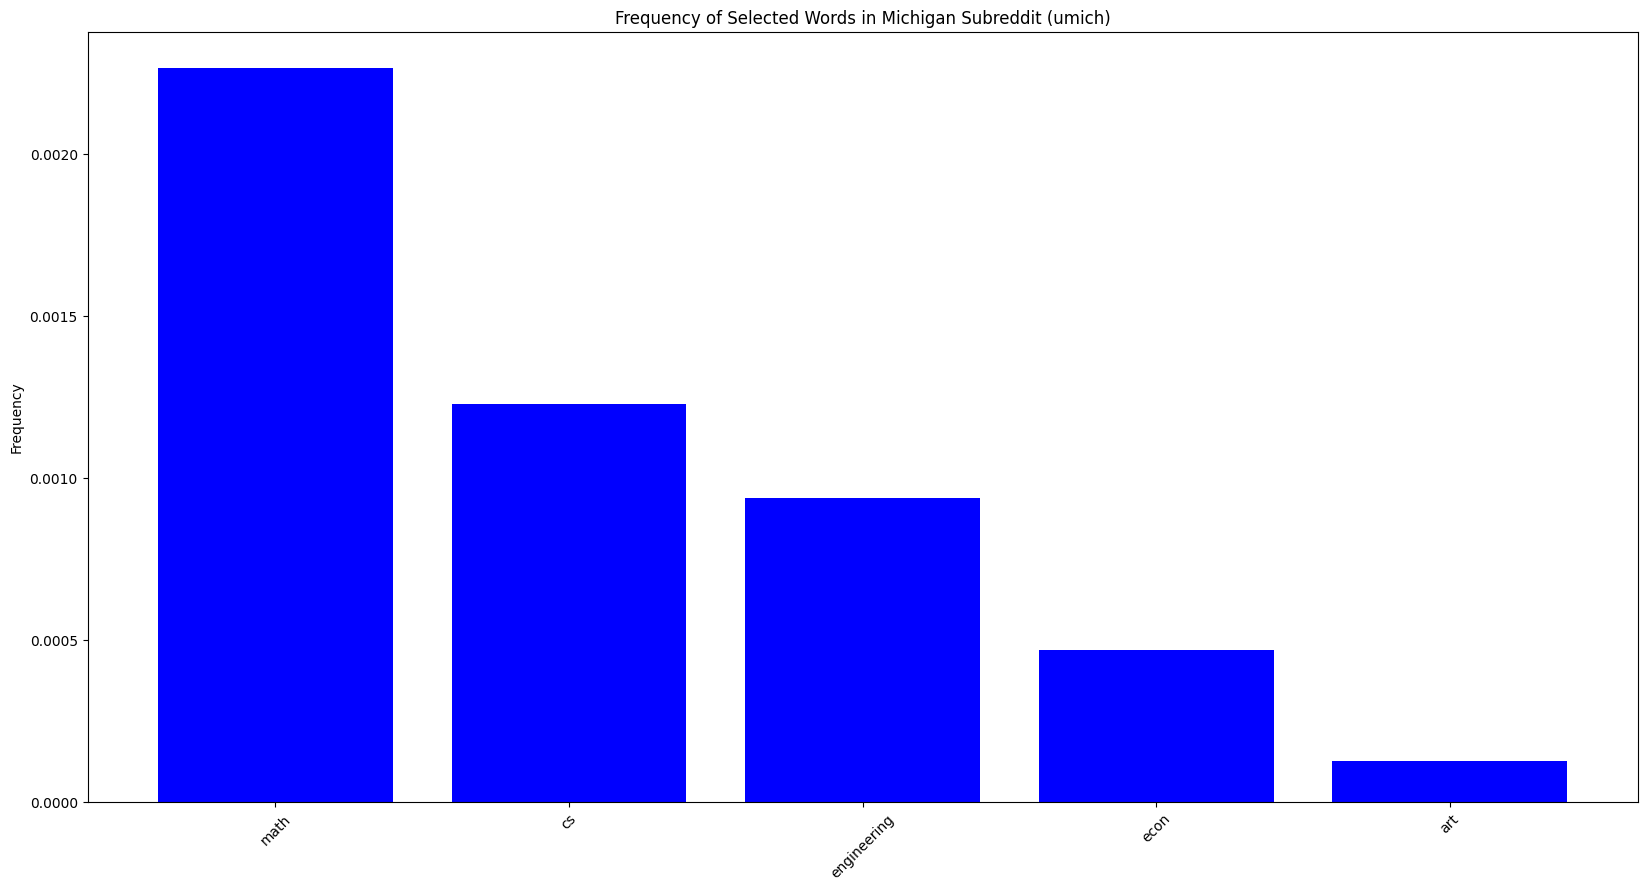

In [25]:
#TODO: pick 5 words that you find interesting or are curious about, and plot a bar plot of their frequency in this dataset 

# Defining the words of interest
interesting_words = ["math", "art", "econ", "cs", "engineering"]

plot_list = word_counts[word_counts.index.isin(interesting_words)]

plt.figure(figsize=(20, 10))
plt.bar(plot_list.index, plot_list.values, color="blue")
plt.xticks(rotation=45)
plt.title("Frequency of Selected Words in Michigan Subreddit (umich)")
plt.ylabel("Frequency")
## plotting
plt.show()




### Problem 2: repeat this process with the Illinois subreddit data (in this directory as "uiuc.csv"). You should not have to change too much in the previous code besides the dataframe path and name. Your notebook should include the two bar graphs including and excluding stopwords. Use the same 5 words and compare their relative frequency between the two subreddits. Discuss any interesting differences you notice in a short markdown cell. 

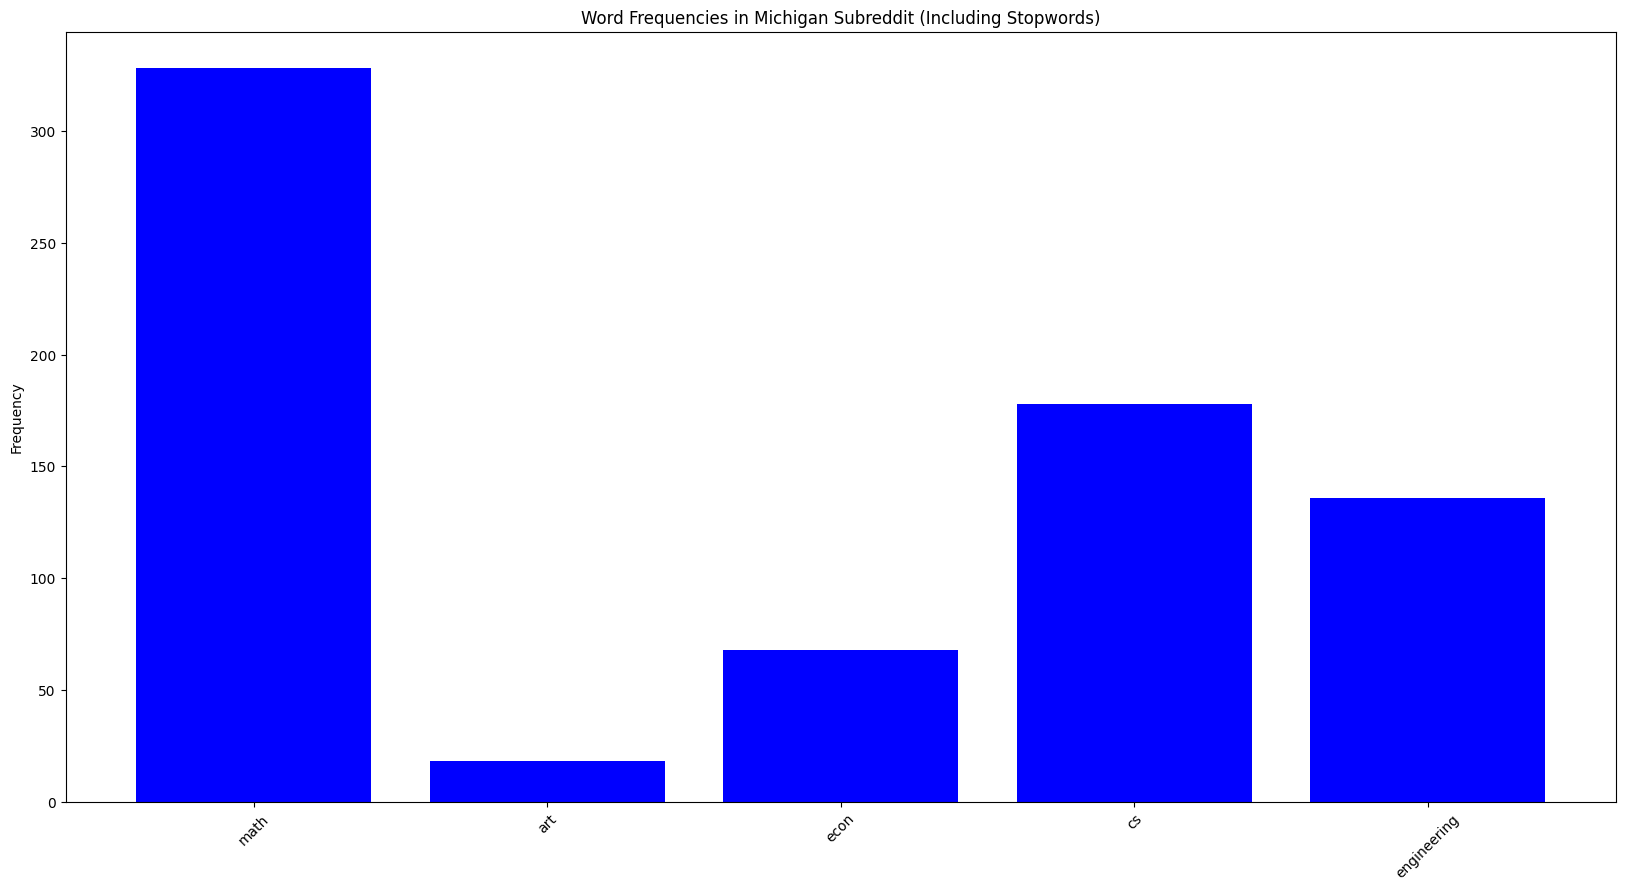

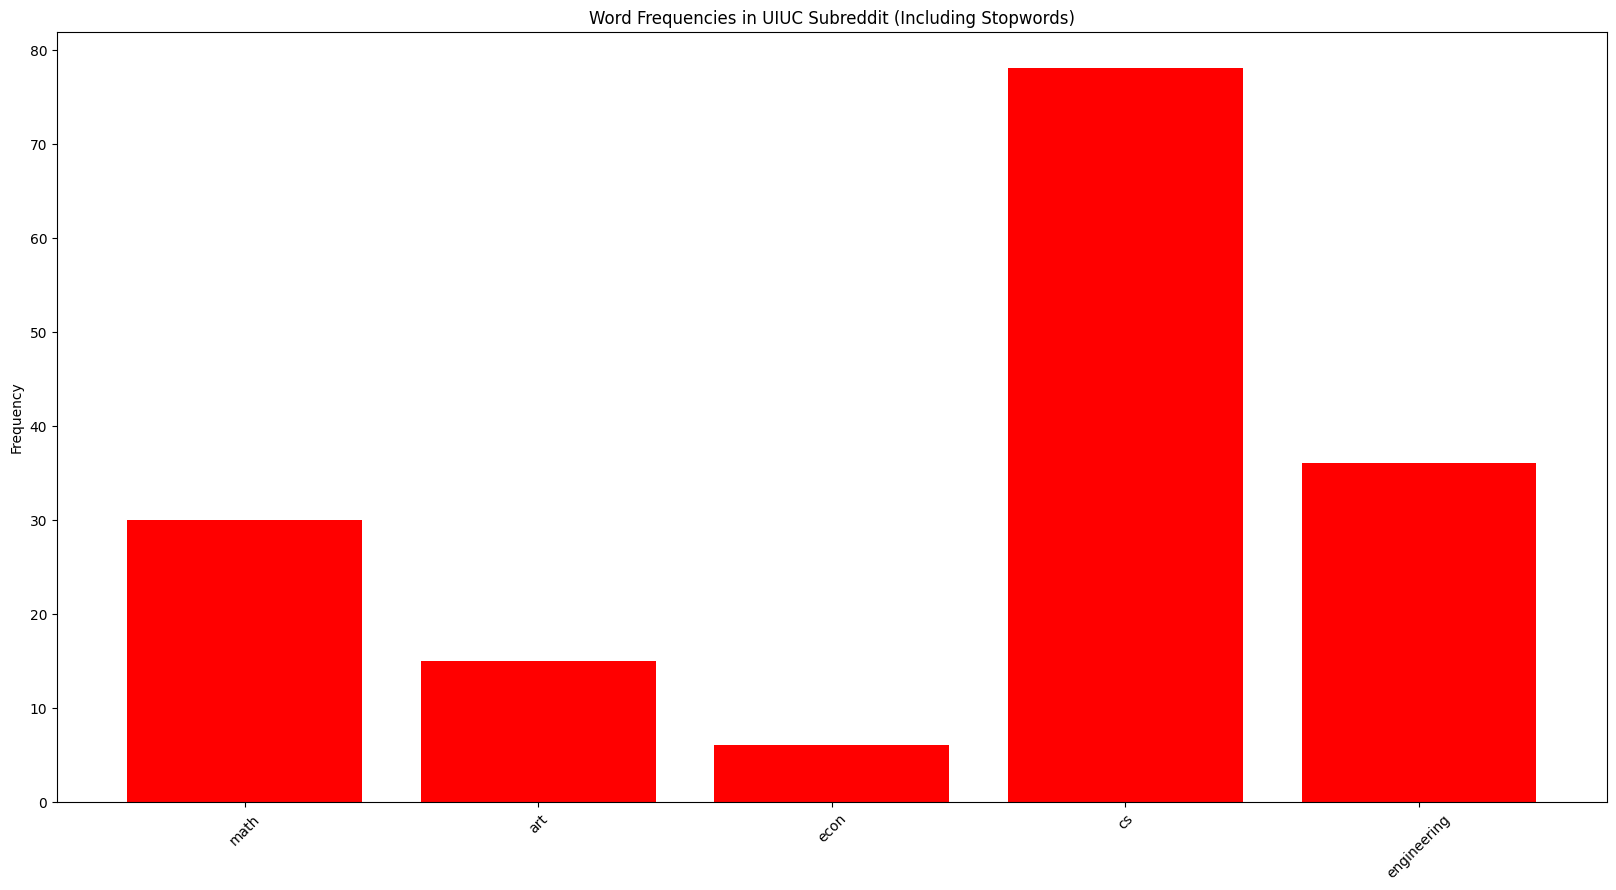

In [26]:
# Re-import necessary libraries since execution state was reset
import pandas as pd
import spacy
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Load the language model for lemmatization
nlp = spacy.load("en_core_web_sm")

# Define text cleaning and lemmatization functions
def clean(text):
    text = ' '.join(str(text).split())  # Remove newline and extra spaces
    text = text.lower()  # Convert to lowercase
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])  # Remove punctuation
    return text

def lemmatize_without_stopwords(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc if not (token.is_stop or token.is_punct)])

# Load UIUC and Michigan data
uiuc = pd.read_csv("uiuc.csv")
umich = pd.read_csv("umich.csv")

# Apply text cleaning
uiuc['cleaned_text'] = uiuc['text'].astype(str).apply(clean)
umich['cleaned_text'] = umich['text'].astype(str).apply(clean)

# Apply lemmatization without stopwords
uiuc['lemmatized_no_stopwords'] = uiuc['cleaned_text'].apply(lemmatize_without_stopwords)
umich['lemmatized_no_stopwords'] = umich['cleaned_text'].apply(lemmatize_without_stopwords)

# Create Bag of Words representations excluding stopwords
vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
uiuc_bow_no_stop = vectorizer.fit_transform(uiuc['lemmatized_no_stopwords'])
umich_bow_no_stop = vectorizer.transform(umich['lemmatized_no_stopwords'])

# Convert to DataFrames
uiuc_bow_df_no_stop = pd.DataFrame(uiuc_bow_no_stop.toarray(), columns=vectorizer.get_feature_names_out())
umich_bow_df_no_stop = pd.DataFrame(umich_bow_no_stop.toarray(), columns=vectorizer.get_feature_names_out())

# Count word occurrences
uiuc_word_counts_no_stop = uiuc_bow_df_no_stop.sum().sort_values(ascending=False)
umich_word_counts_no_stop = umich_bow_df_no_stop.sum().sort_values(ascending=False)

# Define the words of interest
interesting_words = ["math", "art", "econ", "cs", "engineering"]

# Extract frequency of selected words in both datasets (excluding stopwords)
umich_selected_words_no_stop = umich_word_counts_no_stop.reindex(interesting_words, fill_value=0)
uiuc_selected_words_no_stop = uiuc_word_counts_no_stop.reindex(interesting_words, fill_value=0)

# Plot Michigan subreddit word frequencies (including stopwords)
plt.figure(figsize=(20, 10))
plt.bar(umich_selected_words_no_stop.index, umich_selected_words_no_stop.values, color="blue")
plt.xticks(rotation=45)
plt.title("Word Frequencies in Michigan Subreddit (Including Stopwords)")
plt.ylabel("Frequency")
plt.show()

# Plot UIUC subreddit word frequencies (including stopwords)
plt.figure(figsize=(20, 10))
plt.bar(uiuc_selected_words_no_stop.index, uiuc_selected_words_no_stop.values, color="red")
plt.xticks(rotation=45)
plt.title("Word Frequencies in UIUC Subreddit (Including Stopwords)")
plt.ylabel("Frequency")
plt.show()


##### Answer: The two barplots show the difference in major distribution across both schools. In the Umich reddit community (marked by blue), we notice the highest traffic on 'math', which could indicate that math is the most popular major at Umich. Meanwhile, in the Uiuc reddit community (marked by orange), we notice the highest traffic on 'cs', which could indicate that cs is the most popular major at Uiuc. Additionally, we see that econ is studied more at UMich, while art is studied more at Uiuc. Lastly, the numbers for engineering as a major are pretty similar (according to the ratio, not volume) at both colleges. From this data, we can also tell that UMich has a more active reddit community due to higher search numbers and frequency, indicating that they have a more active social media presence compared to Uiuc.

### Problem 3: using the provided combined dataframe, train a logistic regression model using the sklearn Logistic Regression implementation. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html. Create a bag of words table from the combined data, and use that along with the "label" column to train the classifier. Please try this out and be prepared with issues or questions next Monday. We will be discussing in class

In [27]:
#clean and lemmatize the data csv

import pandas as pd
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
nlp = spacy.load("en_core_web_sm")

# Define text cleaning and lemmatization functions
def clean(text):
    text = ' '.join(str(text).split())  # Remove newline and extra spaces
    text = text.lower()  # Convert to lowercase
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])  # Remove punctuation
    return text

def batch_lemmatize(texts, nlp):
    """ Process texts in batches using spaCy for efficiency """
    docs = list(nlp.pipe(texts, disable=["ner", "parser"]))  # Process in batches
    return [" ".join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct]) for doc in docs]

# Load UIUC and Michigan data
uiuc = pd.read_csv("uiuc.csv")
umich = pd.read_csv("umich.csv")

# Assign labels to differentiate subreddits (1 for UIUC, 0 for Michigan)
uiuc['label'] = 1
umich['label'] = 0

# Combine datasets
data = pd.concat([uiuc, umich])

# Apply text cleaning
data['cleaned_text'] = data['text'].astype(str).apply(clean)

# Apply optimized batch lemmatization
data['lemmatized_text'] = batch_lemmatize(data['cleaned_text'], nlp)



In [28]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
X = vectorizer.fit_transform(data['lemmatized_text'])
y = data['label']



In [29]:
#train a logistic regression model using the bag of words features as X and the label column as y
model = LogisticRegression(max_iter=500, solver='lbfgs')
model.fit(X, y)


LogisticRegression(max_iter=500)

In [30]:
#report the accuracy of the model
y_pred = model.predict(X)
test_accuracy = accuracy_score(y, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.9025


#### Part 2: hold out part of the dataset using sklearn train_test_split (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Pass in your previously generated bag of words as X and the label column as y. Use only the X_train and y_train for training and hold out the X_test and y_test to score the model on unseen data.

In [31]:
# what is the accuracy of the model? Is it better or worse than previous?Why do you think it has changed? 

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Split dataset into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# Train a logistic regression model
model = LogisticRegression(max_iter=500, solver='lbfgs')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Output the accuracy of the model
print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.7401454267125909


#### Hence, the accuracy has decreased from 0.90 to 0.74. The accuracy decreased duesince there was test-train split performed (80-20) since the training was not done on all of the data, thereby resulting in a decrease of accuracy.

#### Part 3: Examine the top features of your model using the following code

In [32]:
#get the coefficients of the model and plot the top 10 most positive and top 10 most negative coefficients
#what do you notice about these words? Are they surprising or expected?


In [33]:
X

<13064x12044 sparse matrix of type '<class 'numpy.int64'>'
	with 187519 stored elements in Compressed Sparse Row format>

In [34]:
coefficients = pd.DataFrame({'feature': vectorizer.get_feature_names_out(), 'coefficient': model.coef_[0]})
coefficients = coefficients.sort_values('coefficient', ascending=False)
top_10_positive = coefficients.head(10)
top_10_negative = coefficients.tail(10)

In [35]:
top_10_positive

,feature,coefficient
11016,uiuc,2.747459
8893,rso,2.592879
11188,urbana,2.280025
4137,grainger,2.265811
4753,illini,2.113735
2176,danville,2.036520
1316,champaign,1.996415
4756,illinois,1.976192
5358,las,1.877230
47,ac,1.742329


In [36]:
top_10_negative

,feature,coefficient
2105,csg,-1.674268
603,august,-1.725478
8877,ross,-1.736629
11168,uofm,-1.823403
2782,eec,-1.934156
2431,diag,-2.098025
3566,fresno,-2.156559
11031,umich,-2.170868
11024,um,-2.250159
6325,michigan,-3.009914


#### These words do make sense since they help categorize words into their respective categories (colleges). The top 10 positive coefficients are words that are more likely to be associated with the UIUC subreddit, while the top 10 negative coefficients are words that are more likely to be associated with the Michigan subreddit. The positive coefficients include words like "uiuc", "illinois", "engineering", "cs", and "ece", which are specific to the University of Illinois at Urbana-Champaign. The negative coefficients include words like "umich", "michigan", "wolverine", "ann arbor", and "go blue", which are specific to the University of Michigan. These results are expected, as the model is learning to differentiate between the two subreddits based on the frequency of these words in the text data.

### Problem 4: Train a 10 topic topic model from the UIUC subreddit data using Gensim LDA. (https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html) If you get here before Wednesday 9/11, don't rush to finish, but feel free to continue ahead. We will go through this in class. Print out the top words in each topic, and read through the words for each topic to decide the theme of the topic: remember this is subjective and there are no right or wrong answers. Print out a few comments with high frequencies of each topic and analyze if your topic labels were representative. 

In [38]:
!pip3 install gensim

In [39]:
#train a lda topic model with gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.matutils import Sparse2Corpus

#convert bow X into a gensim corpus
corpus = Sparse2Corpus(X, documents_columns=False)

# Step 3: Create a dictionary from the vectorizer's vocabulary
id2word = dict((v, k) for k, v in vectorizer.vocabulary_.items())

In [41]:
#train the lda model
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=20)

#show the topics
lda_model.print_topics()

[(0,
  '0.040*"fund" + 0.025*"blue" + 0.023*"override" + 0.022*"advisor" + 0.022*"research" + 0.021*"government" + 0.020*"online" + 0.019*"psych" + 0.015*"ask" + 0.014*"sure"'),
 (1,
  '0.100*"texas" + 0.037*"like" + 0.018*"close" + 0.017*"feel" + 0.015*"free" + 0.014*"feel like" + 0.014*"bed" + 0.013*"west" + 0.011*"tbh" + 0.011*"think"'),
 (2,
  '0.050*"dm" + 0.018*"waitlist" + 0.018*"get" + 0.016*"email" + 0.014*"cheap" + 0.014*"double" + 0.013*"cost" + 0.010*"apartment" + 0.009*"state" + 0.009*"not"'),
 (3,
  '0.016*"know" + 0.016*"like" + 0.013*"not" + 0.012*"time" + 0.012*"year" + 0.009*"help" + 0.008*"go" + 0.008*"reddit" + 0.008*"try" + 0.008*"vs"'),
 (4,
  '0.052*"look" + 0.039*"buy" + 0.020*"workload" + 0.020*"msu" + 0.017*"check" + 0.016*"pay" + 0.015*"meeting" + 0.014*"lmao" + 0.014*"good" + 0.014*"like"'),
 (5,
  '0.051*"math" + 0.034*"class" + 0.028*"take" + 0.020*"professor" + 0.018*"good" + 0.018*"stat" + 0.017*"time" + 0.013*"gsi" + 0.013*"not" + 0.013*"study"'),
 (6,


#### LDA model output showed five key topics derived from student discussions. Each topic had groups of high-frequency words, indicating category and themes. For example, one topic included words like math, professor, exams, pointing to academics, while another had apartment, rent, location, suggesting housing concerns. Words like career fair, job opportunities highlighted career-related discussions, while football, stadium, atmosphere indicated social events. The most frequent topic was likely financial aid with words like tuition, aid, cost.